In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle


In [111]:
#Read the dataset
df = pd.read_csv('dataset/train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
'''
Columns

    ID - ID of the patient
    A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
    age - Age of the patient in years
    gender - Gender of the patient
    ethnicity - Ethnicity of the patient
    jaundice - Whether the patient had jaundice at the time of birth
    autism - Whether an immediate family member has been diagnosed with autism
    contry_of_res - Country of residence of the patient
    used_app_before - Whether the patient has undergone a screening test before
    result - Score for AQ1-10 screening test
    age_desc - Age of the patient
    relation - Relation of patient who completed the test
    Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

'''

In [112]:
#A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [113]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [114]:
#Removes the trancated columns
pd.set_option('display.max_columns', None)

In [11]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [116]:
df.shape

(800, 22)

In [117]:
#Converting age from float to int
df['age'] = df['age'].astype(int)
df.head(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1


In [118]:
#Going theugh the columns to identify categorical features
#and numerical features
#Categorical features are those which have a limited number of values
#Numerical features are those which can take any value in a range
for col in df.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, df[col].unique())
        print("."*50)

A1_Score [1 0]
..................................................
A2_Score [0 1]
..................................................
A3_Score [1 0]
..................................................
A4_Score [0 1]
..................................................
A5_Score [1 0]
..................................................
A6_Score [0 1]
..................................................
A7_Score [1 0]
..................................................
A8_Score [0 1]
..................................................
A9_Score [1 0]
..................................................
A10_Score [1 0]
..................................................
gender ['f' 'm']
..................................................
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
..................................................
jaundice ['no' 'yes']
..................................................
austim

In [119]:
df = df.drop(columns=['ID','age_desc'])

In [120]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [121]:
df.shape

(800, 20)

In [122]:
df['contry_of_res']. unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [123]:
#Define the maping for country names
country_mapping ={
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

#Replace values in the 'contry_of_res' column
df['country_of_res'] = df['contry_of_res'].replace(country_mapping)

In [124]:
df['country_of_res']. unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [125]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD', 'country_of_res'],
      dtype='object')

In [126]:
df.drop(['contry_of_res'], axis=1, inplace=True)

In [127]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'used_app_before', 'result',
       'relation', 'Class/ASD', 'country_of_res'],
      dtype='object')

In [128]:
df.country_of_res.value_counts()

country_of_res
United States           138
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
Italy                     6
Bahamas                   6
Malaysia                  6
South Africa              6
China                     5
Vietnam                   5
Mexico                    4
Saudi Arabia              4
Aruba                     4
Iraq                      4
Azerbaijan                4
Armenia                   4
Pakistan                  4
Nicaragua                 4
Ukraine                   3
Germany                   3
Serbi

In [129]:
#There is a class imbalance in the dataset
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [130]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [131]:
#Univariate Analysis
sns.set_theme(style="whitegrid")

Mean Age: 27.96375, Median Age: 24.0


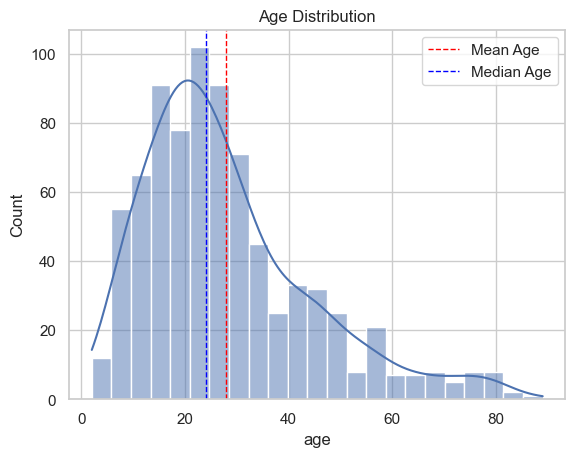

In [132]:
sns.histplot(df['age'], kde = True)
plt.title('Age Distribution')

#Calculate mean and median
mean_age = df['age'].mean()
median_age = df['age'].median() 

print(f"Mean Age: {mean_age}, Median Age: {median_age}")

#Add vertical lines for mean and median
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label='Mean Age')
plt.axvline(median_age, color='blue', linestyle='dashed', linewidth=1, label='Median Age')
plt.legend()
plt.show()

Mean Result: 8.537303106501248, Median Result: 9.605299308


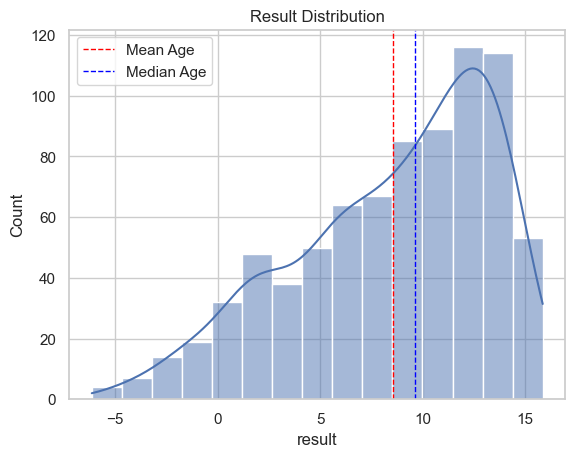

In [133]:
sns.histplot(df['result'], kde = True)
plt.title('Result Distribution')

#Calculate mean and median
mean_result = df['result'].mean()
median_result = df['result'].median() 

print(f"Mean Result: {mean_result}, Median Result: {median_result}")

#Add vertical lines for mean and median
plt.axvline(mean_result, color='red', linestyle='dashed', linewidth=1, label='Mean Age')
plt.axvline(median_result, color='blue', linestyle='dashed', linewidth=1, label='Median Age')
plt.legend()
plt.show()

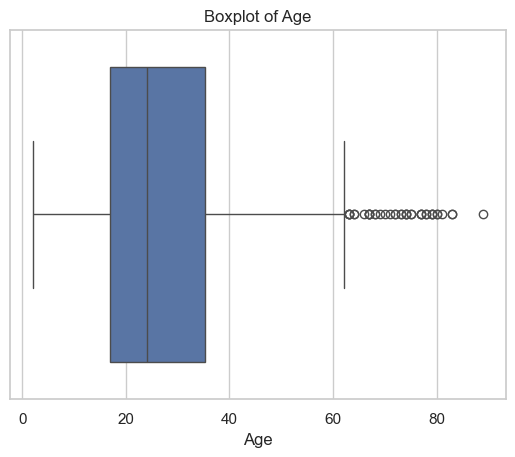

In [134]:
#Use quantile to find outliers
sns.boxplot(x = df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

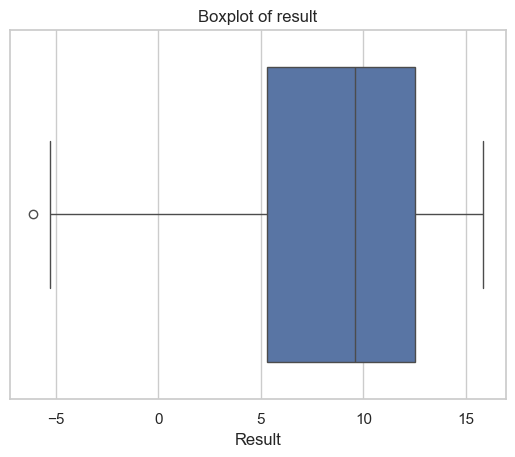

In [135]:
sns.boxplot(x = df['result'])
plt.title('Boxplot of result')
plt.xlabel('Result')
plt.show()

In [136]:
#Count the outliers using interquartile method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,used_app_before,result,relation,Class/ASD,country_of_res
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,yes,12.286905,Self,1,United States
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,no,2.412387,Self,0,Jordan
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,no,11.647281,Self,0,New Zealand
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,no,7.387992,Self,0,United Kingdom
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,no,6.699799,Self,0,United States
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,no,7.813125,Self,0,India
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,no,10.482143,Self,0,United States
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,no,2.459004,Self,1,United States
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,no,13.756476,Self,1,Australia
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,no,2.142376,Self,0,Jordan


In [137]:
len(age_outliers)

39

In [138]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,used_app_before,result,relation,Class/ASD,country_of_res
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,no,-6.137748,Self,0,Jordan


In [54]:
len(result_outliers)

1

In [55]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'used_app_before', 'result',
       'relation', 'Class/ASD', 'country_of_res'],
      dtype='object')

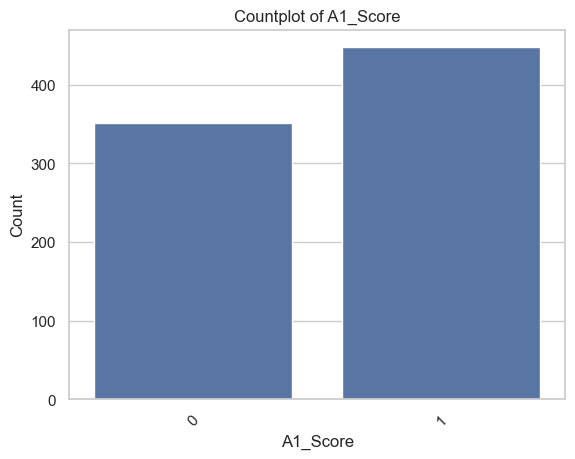

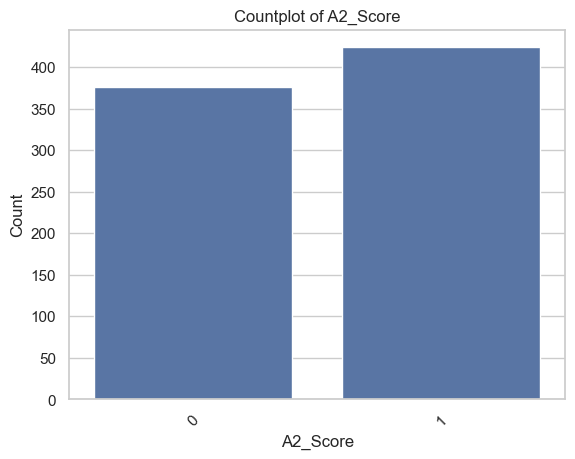

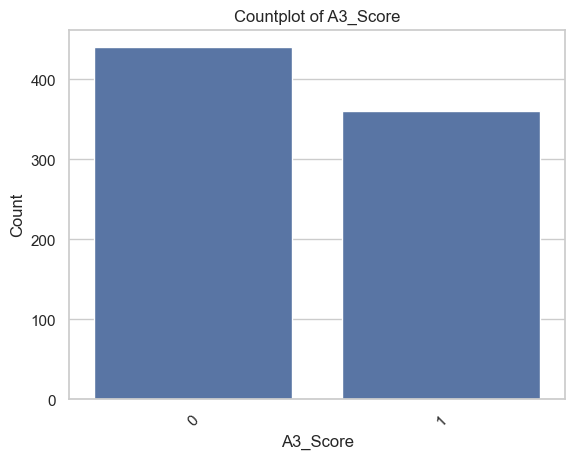

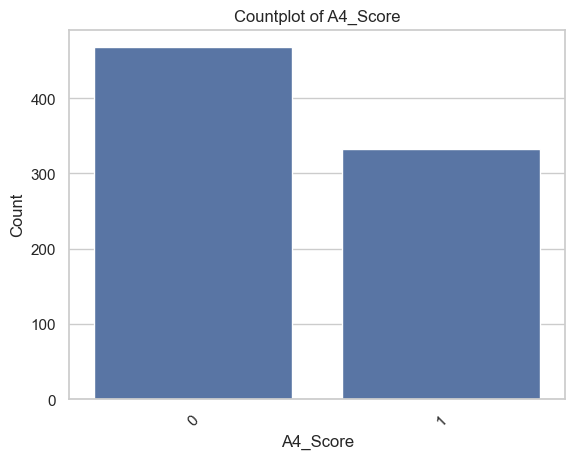

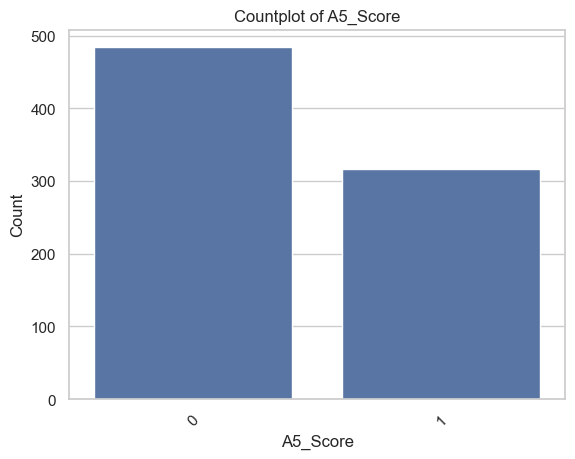

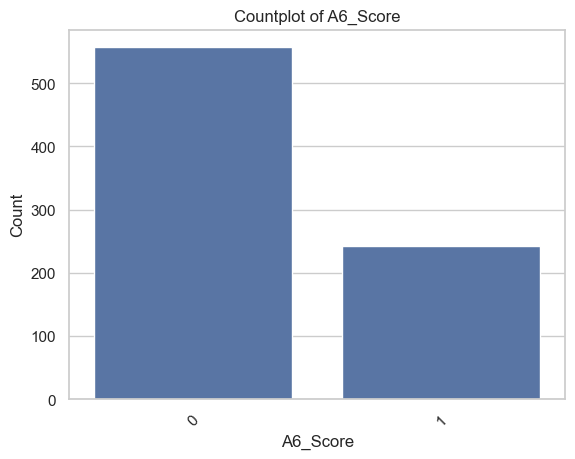

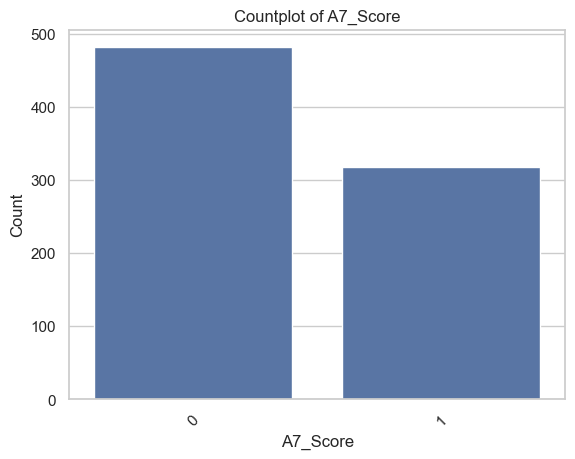

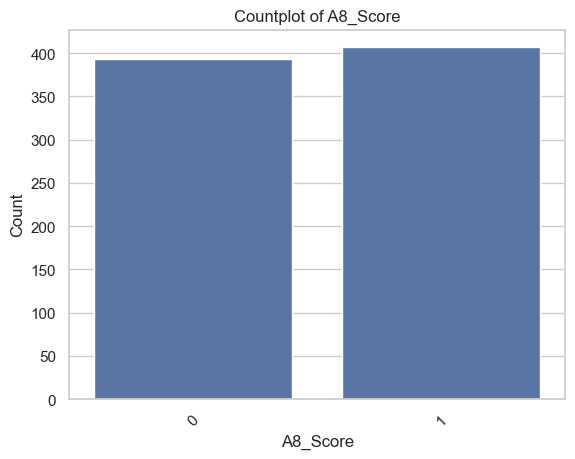

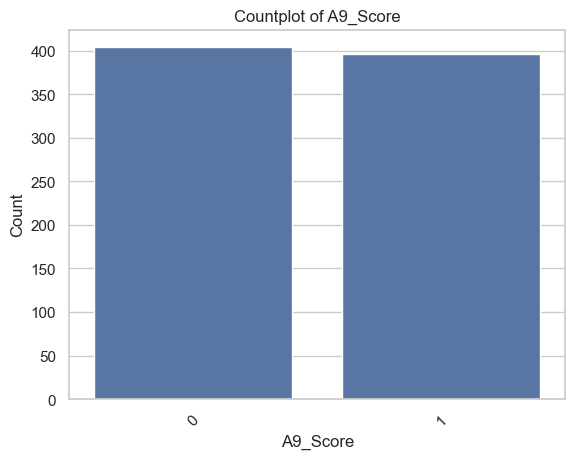

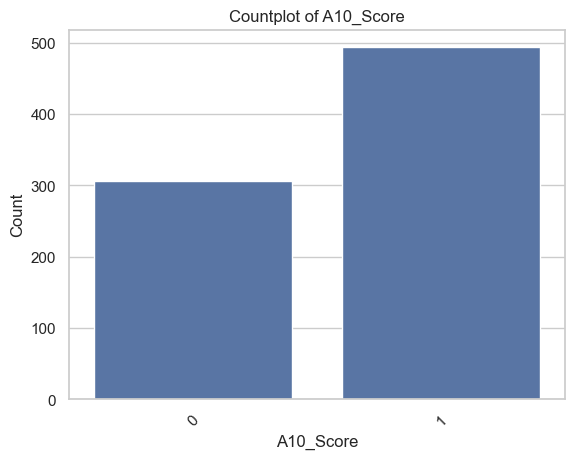

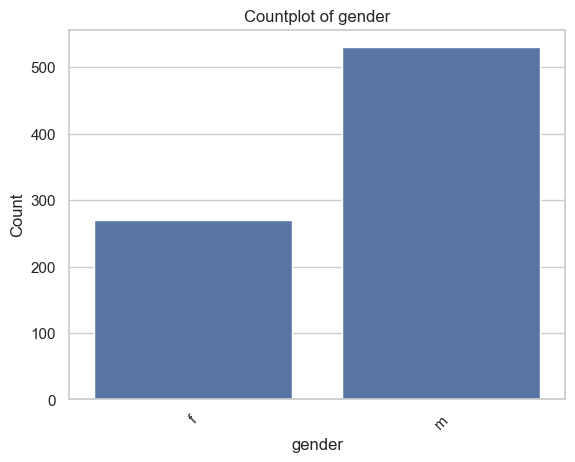

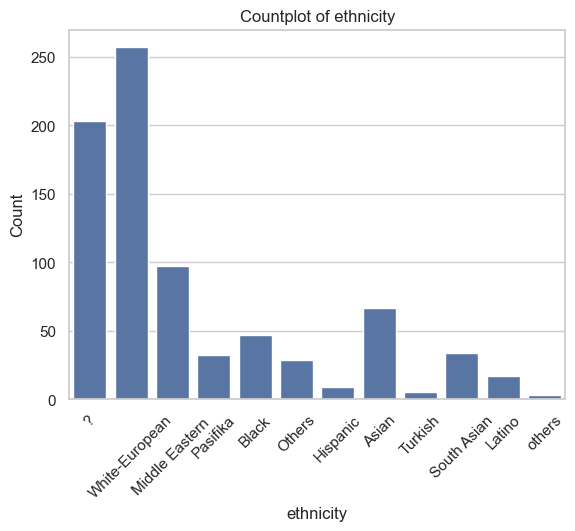

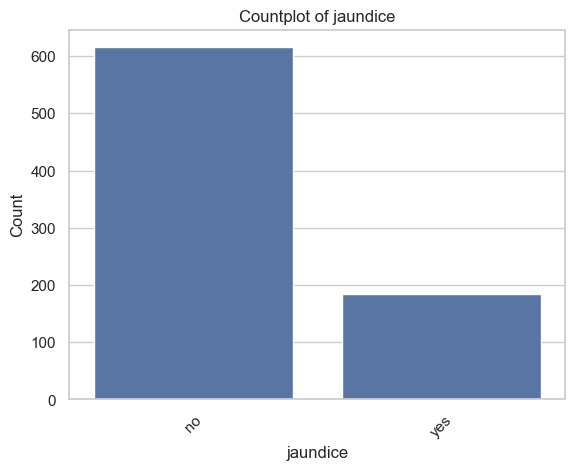

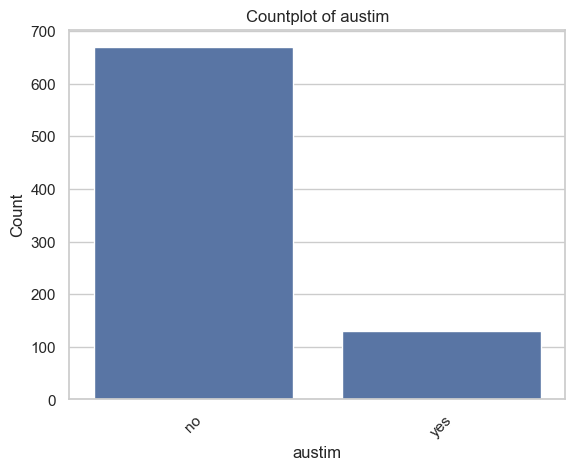

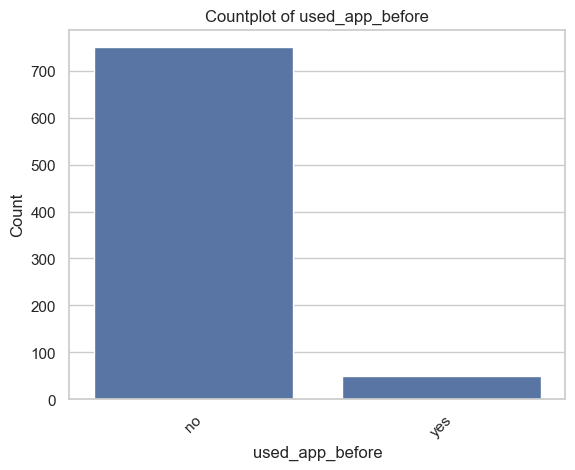

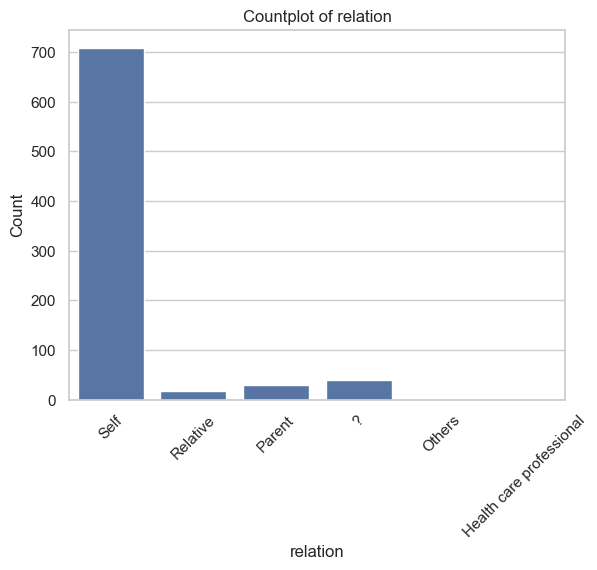

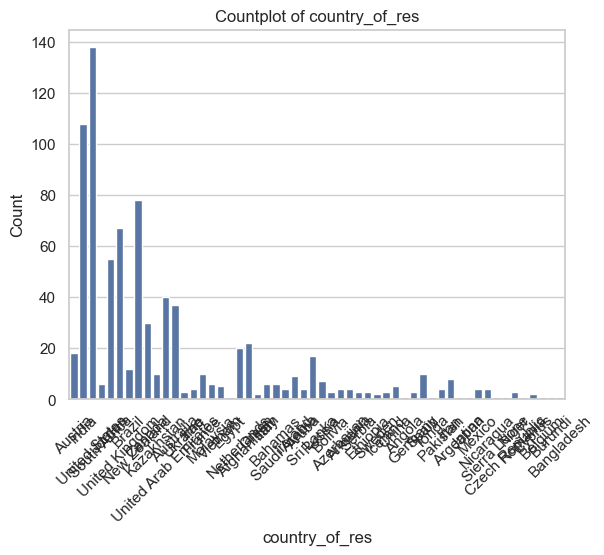

In [139]:
#univariate analysis of categorical features
categorical_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'used_app_before', 
       'relation', 'country_of_res']

for col in categorical_features:
    sns.countplot(x = df[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

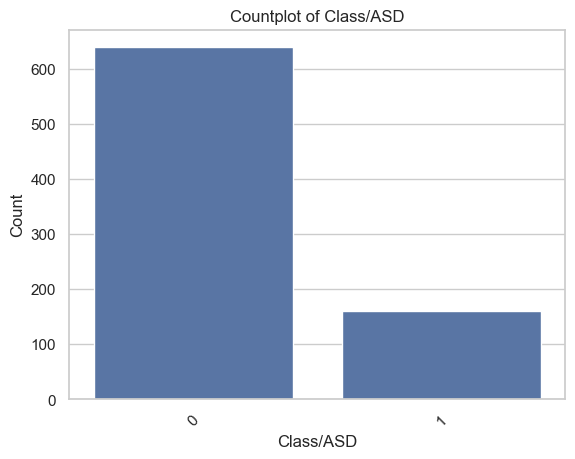

In [140]:
#countplot for target column
sns.countplot(x = df['Class/ASD'])
plt.title('Countplot of Class/ASD')
plt.xlabel('Class/ASD')      
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [141]:
#Handling missing values in ethnicity  and relation column
df["ethnicity"] = df['ethnicity'].replace({"?": "Others", "others": "Others"})


In [142]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [143]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [144]:
df['relation'] = df['relation'].replace(
    {'?': 'Others',
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [145]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [146]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,used_app_before,result,relation,Class/ASD,country_of_res
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,no,6.351166,Self,0,Austria
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,no,2.255185,Self,0,India
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,no,14.851484,Self,1,United States
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,no,2.276617,Self,0,United States
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,no,-4.777286,Self,0,South Africa


In [66]:
#Label Encoding for categorical features
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns:", object_columns)

Object columns: Index(['gender', 'ethnicity', 'jaundice', 'austim', 'used_app_before',
       'relation', 'country_of_res'],
      dtype='object')


In [67]:
encorders = {}

# apply label encoding and store and encoders
for column in object_columns:
    label_encoder  = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encorders[column] = label_encoder  #Save the encoder for future use

#Save the encoders to a file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encorders, f)

In [68]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,used_app_before,result,relation,Class/ASD,country_of_res
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,0,6.351166,1,0,6
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,0,2.255185,1,0,23
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,0,14.851484,1,1,52
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,0,2.276617,1,0,52
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,0,-4.777286,1,0,44


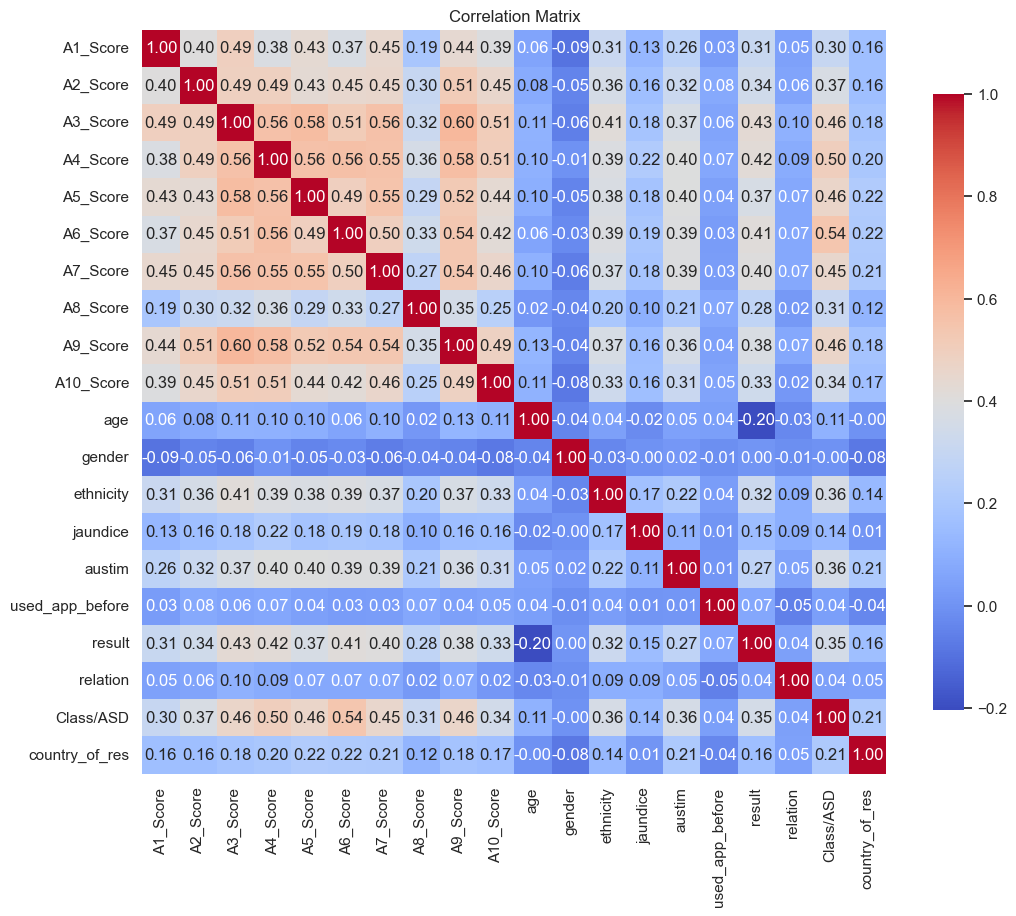

In [70]:
#Correlation matrix using seaborn
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [71]:
#function to replace the outliers with the median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])
    

In [ ]:
#replace outliers in age and result columns
replace_outliers_with_median(df, 'age')
replace_outliers_with_median(df, 'result')  


In [73]:
df.shape

(800, 20)

In [76]:
#Train test split
X = df.drop(columns=['Class/ASD'])
Y = df['Class/ASD']

In [77]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [80]:

X_test.shape

(160, 19)

In [81]:
X_train.shape

(640, 19)

In [82]:
Y_test.value_counts()

Class/ASD
0    128
1     32
Name: count, dtype: int64

In [83]:
Y_train.value_counts()

Class/ASD
0    511
1    129
Name: count, dtype: int64

In [86]:
#We will use SMOTE to fix the class imbalance using minority oversampling technique
smote = SMOTE(random_state=42)  # Create an instance of SMOTE
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [87]:
print(X_train_smote.shape)

(1022, 19)


In [88]:
print(Y_train_smote.shape)

(1022,)


In [89]:
Y_train_smote.value_counts()

Class/ASD
0    511
1    511
Name: count, dtype: int64

In [147]:
#List of classifiers to be used
models = {
    'Decision Tree': DecisionTreeClassifier(random_state= 42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)}

In [148]:
cv_scores = {}
# Cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores.mean()
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f}")

Decision Tree Cross-Validation Accuracy: 0.8679
Random Forest Cross-Validation Accuracy: 0.9130
Logistic Regression Cross-Validation Accuracy: 0.8552


In [149]:
cv_scores

{'Decision Tree': np.float64(0.8679340028694404),
 'Random Forest': np.float64(0.912965088474414),
 'Logistic Regression': np.float64(0.855246293639407)}

In [150]:
#Initializing Models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [152]:

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

params_grid_dt ={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
params_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}   

In [153]:
random_search_dt = RandomizedSearchCV(estimator=decision_tree,param_distributions=params_grid_dt,
                                       n_iter=10, cv=5, verbose=2, random_state=42,
                                       n_jobs=-1, scoring='accuracy')
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf,
                                       n_iter=10, cv=5, verbose=2, random_state=42,
                                       n_jobs=-1, scoring='accuracy')
random_search_lr = RandomizedSearchCV(estimator=logistic_regression, param_distributions=params_grid_lr,
                                       n_iter=10, cv=5, verbose=2, random_state=42,
                                       n_jobs=-1, scoring='accuracy')

In [154]:
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_lr.fit(X_train_smote, Y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Python(78982) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(78983) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(78984) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(78985) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(78986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(78987) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(78988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(78989) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=10;

/Users/njambi/Documents/Fourth Year/ML/project/AutismPredictionSystem/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/njambi/Documents/Fourth Year/ML/project/AutismPredictionSystem/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/njambi/Documents/Fourth Year/ML/project/AutismPredictionSystem/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/njambi/Documents/Fourth Year/ML/project/AutismPredictionSystem/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/njambi/Documents/Fourth Year/ML/proje

[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.3s
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.3s
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.4s
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.4s
[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.4s


/Users/njambi/Documents/Fourth Year/ML/project/AutismPredictionSystem/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy', verbose=2)

In [159]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_
    print("Best Model: Decision Tree")

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_
    print("Best Model: Decision Tree")    
if random_search_lr.best_score_ > best_score:
    best_model = random_search_lr.best_estimator_
    best_score = random_search_lr.best_score_
    print("Best Model: Logistic Regression")

Best Model: Decision Tree
Best Model: Decision Tree


In [161]:
print("Best Model:", best_model)
print("Best Score:", best_score)

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       random_state=42)
Best Score: 0.9198087039693927


In [162]:
#save on a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [163]:
#Evaluate the best model on the test set
Y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))    
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))    


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       128
           1       0.53      0.66      0.58        32

    accuracy                           0.81       160
   macro avg       0.72      0.75      0.73       160
weighted avg       0.83      0.81      0.82       160

Confusion Matrix:
[[109  19]
 [ 11  21]]
Accuracy Score: 0.8125
